<a href="https://colab.research.google.com/github/mnhtm187/Minh-T-m-31241027094/blob/main/Fashion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 15s 26ms/step - accuracy: 0.7227 - loss: 0.7790 - val_accuracy: 0.8405 - val_loss: 0.4368
Epoch 2/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - accuracy: 0.8494 - loss: 0.4164 - val_accuracy: 0.8512 - val_loss: 0.4169
Epoch 3/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.8667 - loss: 0.3648 - val_accuracy: 0.8620 - val_loss: 0.3851
Epoch 4/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.8751 - loss: 0.3419 - val_accuracy: 0.8718 - val_loss: 0.3512
Epoch 5/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.8812 - loss: 0.3249 - val_accuracy: 0.8703 - val_loss: 0.3534
Epoch 6/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - accuracy: 0.8834 - loss: 0.3145 - val_accuracy: 0.8769 - val_loss: 0.3566
Epoch 7/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.8899 - loss: 0.3004 - val_accuracy: 0.8735 - val_loss: 0.3525
Epoch 8/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.8901 - loss: 0.29

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
 Dự đoán ảnh là: Dress


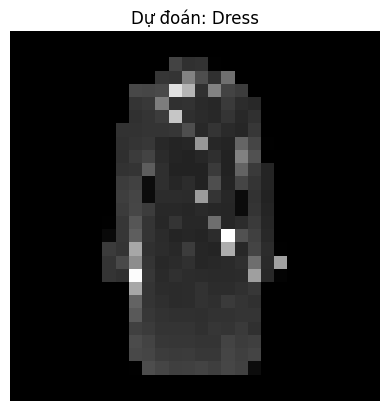

In [5]:
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation,Flatten
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
import cv2
from sklearn.metrics import accuracy_score


(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_valid, X_train = X_train[:5000] / 255.0, X_train[5000:] / 255.0
y_valid, y_train = y_train[:5000], y_train[5000:]

model = Sequential()
model.add(Flatten(input_shape=[28, 28]))
model.add(Dense(300, activation="relu"))
model.add(Dense(100, activation="relu"))
model.add(Dense(10, activation="softmax"))

model.summary()
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train_cat, epochs=100, batch_size=128, validation_data=(x_test, y_test_cat))

test_loss, test_acc = model.evaluate(x_test, y_test_cat)
print(' Test accuracy:', test_acc)


label_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
label_names[y_train[0]]

img = cv2.imread('/content/drive/MyDrive/ảnh/bag', cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (28, 28))
img = cv2.bitwise_not(img)
img = img.astype('float32') / 255.0
img_input = img.reshape(1, 784)

prediction = model.predict(img_input)
predicted_label = np.argmax(prediction)

print(" Dự đoán ảnh là:", label_names[predicted_label])
plt.imshow(img, cmap='gray')
plt.title(f"Dự đoán: {label_names[predicted_label]}")
plt.axis('off')
plt.show()


Epoch 1/200
430/430 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.7287 - loss: 0.7618 - val_accuracy: 0.8466 - val_loss: 0.4179
Epoch 2/200
430/430 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.8519 - loss: 0.3989 - val_accuracy: 0.8620 - val_loss: 0.3664
Epoch 3/200
430/430 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.8711 - loss: 0.3507 - val_accuracy: 0.8756 - val_loss: 0.3339
Epoch 4/200
430/430 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8814 - loss: 0.3228 - val_accuracy: 0.8756 - val_loss: 0.3449
Epoch 5/200
430/430 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8868 - loss: 0.3023 - val_accuracy: 0.8820 - val_loss: 0.3155
Epoch 6/200
430/430 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.8920 - loss: 0.2857 - val_accuracy: 0.8818 - val_loss: 0.3310
Epoch 7/200
430/430 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8995 - loss: 0.2687 - val_accuracy: 0.8526 - val_loss: 0.4348
Epoch 8/200
430/430 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.9014 - loss: 0.2607 - val

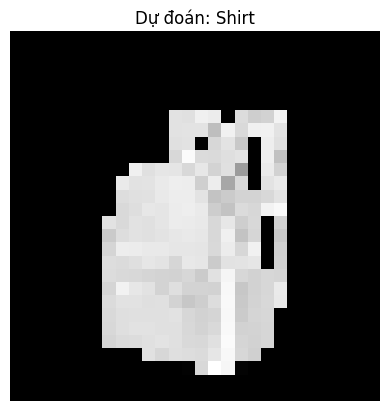

In [15]:
from keras.datasets import fashion_mnist
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()


x_valid, x_train = x_train[:5000] / 255.0, x_train[5000:] / 255.0
y_valid, y_train = y_train[:5000], y_train[5000:]
x_test = x_test / 255.0

y_train_cat = to_categorical(y_train)
y_valid_cat = to_categorical(y_valid)
y_test_cat = to_categorical(y_test)


model = Sequential()
model.add(Flatten(input_shape=[28, 28]))
model.add(Dense(300, activation="relu"))
model.add(Dense(100, activation="relu"))
model.add(Dense(10, activation="softmax"))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])


history = model.fit(x_train, y_train_cat, epochs=200, batch_size=128, validation_data=(x_valid, y_valid_cat))


test_loss, test_acc = model.evaluate(x_test, y_test_cat)
print(' Độ chính xác trên tập test:', test_acc)


label_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

image_path = '/content/drive/MyDrive/ảnh/bag'
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (28, 28))
img = cv2.bitwise_not(img)
img = img.astype('float32') / 255.0
img_input = img.reshape(1, 28, 28)

prediction = model.predict(img_input)
predicted_label = np.argmax(prediction)

print(" Dự đoán ảnh là:", label_names[predicted_label])
plt.imshow(img, cmap='gray')
plt.title(f"Dự đoán: {label_names[predicted_label]}")
plt.axis('off')
plt.show()
model.save("fashion_model.keras")


Epoch 1/130
430/430 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.5509 - loss: 1.4521 - val_accuracy: 0.7676 - val_loss: 0.7217
Epoch 2/130
430/430 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7725 - loss: 0.6888 - val_accuracy: 0.8100 - val_loss: 0.5803
Epoch 3/130
430/430 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8074 - loss: 0.5816 - val_accuracy: 0.8300 - val_loss: 0.5190
Epoch 4/130
430/430 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8241 - loss: 0.5249 - val_accuracy: 0.8372 - val_loss: 0.4848
Epoch 5/130
430/430 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8305 - loss: 0.5000 - val_accuracy: 0.8362 - val_loss: 0.4736
Epoch 6/130
430/430 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.8356 - loss: 0.4790 - val_accuracy: 0.8444 - val_loss: 0.4607
Epoch 7/130
430/430 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8403 - loss: 0.4614 - val_accuracy: 0.8408 - val_loss: 0.4519
Epoch 8/130
430/430 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8494 - loss: 0.4381 - val_accu

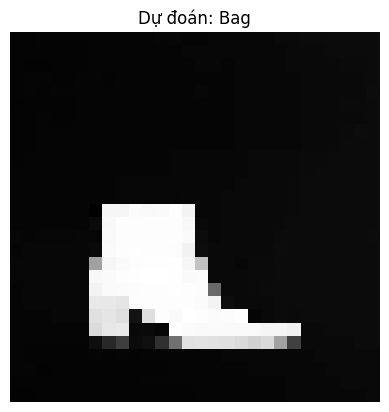

In [20]:
from keras.datasets import fashion_mnist
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()


x_valid, x_train = x_train[:5000] / 255.0, x_train[5000:] / 255.0
y_valid, y_train = y_train[:5000], y_train[5000:]
x_test = x_test / 255.0

y_train_cat = to_categorical(y_train)
y_valid_cat = to_categorical(y_valid)
y_test_cat = to_categorical(y_test)


model = Sequential()
model.add(Flatten(input_shape=[28, 28]))
model.add(Dense(300, activation="relu"))
model.add(Dense(100, activation="relu"))
model.add(Dense(10, activation="softmax"))

model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])


history = model.fit(x_train, y_train_cat, epochs=130, batch_size=128, validation_data=(x_valid, y_valid_cat))


test_loss, test_acc = model.evaluate(x_test, y_test_cat)
print(' Độ chính xác trên tập test:', test_acc)


label_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

image_path = '/content/drive/MyDrive/ảnh/boots.jpg'
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (28, 28))
img = cv2.bitwise_not(img)
img = img.astype('float32') / 255.0
img_input = img.reshape(1, 28, 28)

prediction = model.predict(img_input)
predicted_label = np.argmax(prediction)

print(" Dự đoán ảnh là:", label_names[predicted_label])
plt.imshow(img, cmap='gray')
plt.title(f"Dự đoán: {label_names[predicted_label]}")
plt.axis('off')
plt.show()
model.save("fashion_model.keras")


Epoch 1/300
284/284 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.5090 - loss: 1.6071 - val_accuracy: 0.7332 - val_loss: 0.8312
Epoch 2/300
284/284 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.7419 - loss: 0.7940 - val_accuracy: 0.7838 - val_loss: 0.6659
Epoch 3/300
284/284 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.7830 - loss: 0.6613 - val_accuracy: 0.8104 - val_loss: 0.5870
Epoch 4/300
284/284 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8074 - loss: 0.5834 - val_accuracy: 0.8242 - val_loss: 0.5420
Epoch 5/300
284/284 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.8160 - loss: 0.5492 - val_accuracy: 0.8282 - val_loss: 0.5293
Epoch 6/300
284/284 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.8250 - loss: 0.5191 - val_accuracy: 0.8368 - val_loss: 0.4966
Epoch 7/300
284/284 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8299 - loss: 0.5032 - val_accuracy: 0.8380 - val_loss: 0.4882
Epoch 8/300
284/284 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8332 - loss: 0.4866 - val_

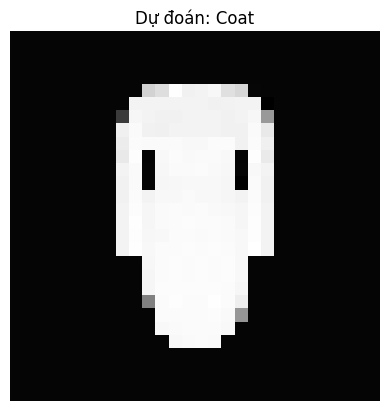

In [21]:
from keras.datasets import fashion_mnist
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()


x_valid, x_train = x_train[:5000] / 255.0, x_train[5000:] / 255.0
y_valid, y_train = y_train[:5000], y_train[5000:]
x_test = x_test / 255.0

y_train_cat = to_categorical(y_train)
y_valid_cat = to_categorical(y_valid)
y_test_cat = to_categorical(y_test)


model = Sequential()
model.add(Flatten(input_shape=[28, 28]))
model.add(Dense(300, activation="relu"))
model.add(Dense(100, activation="relu"))
model.add(Dense(10, activation="softmax"))

model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])


history = model.fit(x_train, y_train_cat, epochs=300, batch_size=194, validation_data=(x_valid, y_valid_cat))


test_loss, test_acc = model.evaluate(x_test, y_test_cat)
print(' Độ chính xác trên tập test:', test_acc)


label_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

image_path = '/content/drive/MyDrive/ảnh/dress.webp'
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (28, 28))
img = cv2.bitwise_not(img)
img = img.astype('float32') / 255.0
img_input = img.reshape(1, 28, 28)

prediction = model.predict(img_input)
predicted_label = np.argmax(prediction)

print(" Dự đoán ảnh là:", label_names[predicted_label])
plt.imshow(img, cmap='gray')
plt.title(f"Dự đoán: {label_names[predicted_label]}")
plt.axis('off')
plt.show()
model.save("fashion_model.keras")


Epoch 1/20
430/430 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.5512 - loss: 1.4705 - val_accuracy: 0.7676 - val_loss: 0.7124
Epoch 2/20
430/430 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.7816 - loss: 0.6756 - val_accuracy: 0.8168 - val_loss: 0.5659
Epoch 3/20
430/430 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8126 - loss: 0.5632 - val_accuracy: 0.8296 - val_loss: 0.5143
Epoch 4/20
430/430 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8264 - loss: 0.5148 - val_accuracy: 0.8314 - val_loss: 0.4899
Epoch 5/20
430/430 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.8330 - loss: 0.4925 - val_accuracy: 0.8410 - val_loss: 0.4690
Epoch 6/20
430/430 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8397 - loss: 0.4675 - val_accuracy: 0.8484 - val_loss: 0.4485
Epoch 7/20
430/430 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8458 - loss: 0.4520 - val_accuracy: 0.8468 - val_loss: 0.4470
Epoch 8/20
430/430 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8463 - loss: 0.4458 - val_accuracy: 0

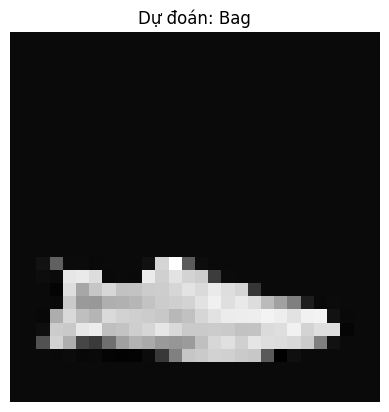

In [25]:
from keras.datasets import fashion_mnist
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()


x_valid, x_train = x_train[:5000] / 255.0, x_train[5000:] / 255.0
y_valid, y_train = y_train[:5000], y_train[5000:]
x_test = x_test / 255.0

y_train_cat = to_categorical(y_train)
y_valid_cat = to_categorical(y_valid)
y_test_cat = to_categorical(y_test)


model = Sequential()
model.add(Flatten(input_shape=[28, 28]))
model.add(Dense(300, activation="relu"))
model.add(Dense(100, activation="relu"))
model.add(Dense(10, activation="softmax"))

model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])


history = model.fit(x_train, y_train_cat, epochs=20, batch_size=128, validation_data=(x_valid, y_valid_cat))


test_loss, test_acc = model.evaluate(x_test, y_test_cat)
print(' Độ chính xác trên tập test:', test_acc)


label_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

image_path = '/content/drive/MyDrive/ảnh/giày.jpg'
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (28, 28))
img = cv2.bitwise_not(img)
img = img.astype('float32') / 255.0
img_input = img.reshape(1, 28, 28)

prediction = model.predict(img_input)
predicted_label = np.argmax(model.predict(img_input), axis=-1)[0]

print(" Dự đoán ảnh là:", label_names[predicted_label])
plt.imshow(img, cmap='gray')
plt.title(f"Dự đoán: {label_names[predicted_label]}")
plt.axis('off')
plt.show()
model.save("fashion_model.keras")


Epoch 1/200
430/430 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.5631 - loss: 1.4202 - val_accuracy: 0.7612 - val_loss: 0.7117
Epoch 2/200
430/430 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.7757 - loss: 0.6765 - val_accuracy: 0.7920 - val_loss: 0.6048
Epoch 3/200
430/430 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8043 - loss: 0.5774 - val_accuracy: 0.8216 - val_loss: 0.5309
Epoch 4/200
430/430 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8212 - loss: 0.5271 - val_accuracy: 0.8292 - val_loss: 0.4980
Epoch 5/200
430/430 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8310 - loss: 0.4918 - val_accuracy: 0.8384 - val_loss: 0.4753
Epoch 6/200
430/430 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.8370 - loss: 0.4703 - val_accuracy: 0.8412 - val_loss: 0.4665
Epoch 7/200
430/430 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8420 - loss: 0.4583 - val_accuracy: 0.8490 - val_loss: 0.4426
Epoch 8/200
430/430 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8441 - loss: 0.4480 - val_ac

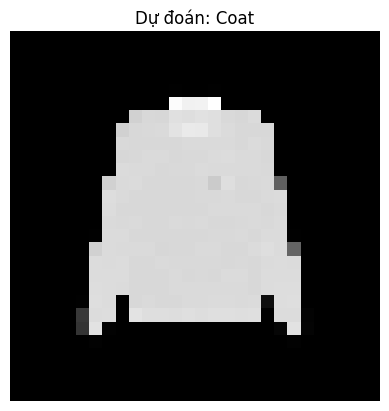

In [38]:
from keras.datasets import fashion_mnist
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()


x_valid, x_train = x_train[:5000] / 255.0, x_train[5000:] / 255.0
y_valid, y_train = y_train[:5000], y_train[5000:]
x_test = x_test / 255.0

y_train_cat = to_categorical(y_train)
y_valid_cat = to_categorical(y_valid)
y_test_cat = to_categorical(y_test)


model = Sequential()
model.add(Flatten(input_shape=[28, 28]))
model.add(Dense(300, activation="relu"))
model.add(Dense(100, activation="relu"))
model.add(Dense(10, activation="softmax"))

model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])


history = model.fit(x_train, y_train_cat, epochs=200, batch_size=128, validation_data=(x_valid, y_valid_cat))


test_loss, test_acc = model.evaluate(x_test, y_test_cat)
print(' Độ chính xác trên tập test:', test_acc)


label_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

image_path = '/content/drive/MyDrive/ảnh/pullover.jpg'
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (28, 28))
img = cv2.bitwise_not(img)
img = img.astype('float32') / 255.0
img_input = img.reshape(1, 28, 28)

prediction = model.predict(img_input)
predicted_label = np.argmax(prediction)

print(" Dự đoán ảnh là:", label_names[predicted_label])
plt.imshow(img, cmap='gray')
plt.title(f"Dự đoán: {label_names[predicted_label]}")
plt.axis('off')
plt.show()
model.save("fashion_model.keras")


Epoch 1/120
430/430 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.7332 - loss: 0.7568 - val_accuracy: 0.8424 - val_loss: 0.4356
Epoch 2/120
430/430 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8506 - loss: 0.4073 - val_accuracy: 0.8710 - val_loss: 0.3522
Epoch 3/120
430/430 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.8699 - loss: 0.3508 - val_accuracy: 0.8730 - val_loss: 0.3592
Epoch 4/120
430/430 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.8794 - loss: 0.3218 - val_accuracy: 0.8752 - val_loss: 0.3503
Epoch 5/120
430/430 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8887 - loss: 0.2984 - val_accuracy: 0.8846 - val_loss: 0.3222
Epoch 6/120
430/430 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.8950 - loss: 0.2831 - val_accuracy: 0.8702 - val_loss: 0.3441
Epoch 7/120
430/430 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8970 - loss: 0.2703 - val_accuracy: 0.8880 - val_loss: 0.3131
Epoch 8/120
430/430 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9038 - loss: 0.2585 - val

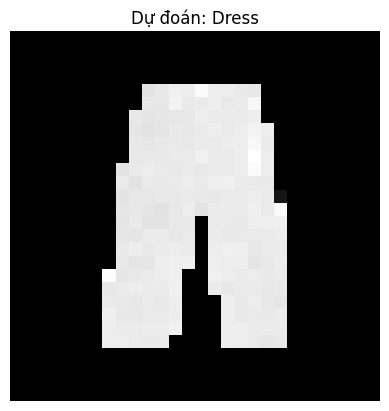

In [36]:
from keras.datasets import fashion_mnist
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()


x_valid, x_train = x_train[:5000] / 255.0, x_train[5000:] / 255.0
y_valid, y_train = y_train[:5000], y_train[5000:]
x_test = x_test / 255.0

y_train_cat = to_categorical(y_train)
y_valid_cat = to_categorical(y_valid)
y_test_cat = to_categorical(y_test)


model = Sequential()
model.add(Flatten(input_shape=[28, 28]))
model.add(Dense(300, activation="relu"))
model.add(Dense(100, activation="relu"))
model.add(Dense(10, activation="softmax"))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])


history = model.fit(x_train, y_train_cat, epochs=120, batch_size=128, validation_data=(x_valid, y_valid_cat))


test_loss, test_acc = model.evaluate(x_test, y_test_cat)
print(' Độ chính xác trên tập test:', test_acc)


label_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

image_path = '/content/drive/MyDrive/ảnh/quần.jpg'
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (28, 28))
img = cv2.bitwise_not(img)
img = img.astype('float32') / 255.0
img_input = img.reshape(1, 28, 28)

prediction = model.predict(img_input)
predicted_label = np.argmax(prediction)

print(" Dự đoán ảnh là:", label_names[predicted_label])
plt.imshow(img, cmap='gray')
plt.title(f"Dự đoán: {label_names[predicted_label]}")
plt.axis('off')
plt.show()
model.save("fashion_model.keras")


Epoch 1/20
430/430 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.5657 - loss: 1.4748 - val_accuracy: 0.7676 - val_loss: 0.7194
Epoch 2/20
430/430 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.7746 - loss: 0.6918 - val_accuracy: 0.8058 - val_loss: 0.5894
Epoch 3/20
430/430 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8074 - loss: 0.5825 - val_accuracy: 0.8154 - val_loss: 0.5404
Epoch 4/20
430/430 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8222 - loss: 0.5333 - val_accuracy: 0.8376 - val_loss: 0.4945
Epoch 5/20
430/430 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.8284 - loss: 0.5017 - val_accuracy: 0.8434 - val_loss: 0.4691
Epoch 6/20
430/430 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8351 - loss: 0.4820 - val_accuracy: 0.8458 - val_loss: 0.4518
Epoch 7/20
430/430 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8410 - loss: 0.4589 - val_accuracy: 0.8444 - val_loss: 0.4456
Epoch 8/20
430/430 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8421 - loss: 0.4521 - val_accuracy: 

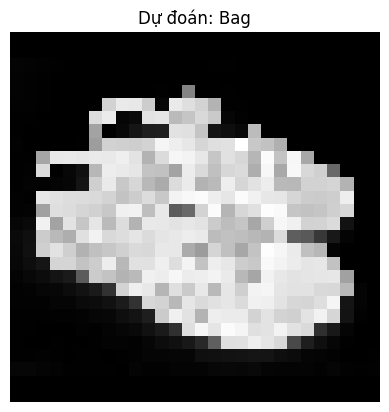

In [34]:
from keras.datasets import fashion_mnist
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()


x_valid, x_train = x_train[:5000] / 255.0, x_train[5000:] / 255.0
y_valid, y_train = y_train[:5000], y_train[5000:]
x_test = x_test / 255.0

y_train_cat = to_categorical(y_train)
y_valid_cat = to_categorical(y_valid)
y_test_cat = to_categorical(y_test)


model = Sequential()
model.add(Flatten(input_shape=[28, 28]))
model.add(Dense(300, activation="relu"))
model.add(Dense(100, activation="relu"))
model.add(Dense(10, activation="softmax"))

model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])


history = model.fit(x_train, y_train_cat, epochs=20, batch_size=128, validation_data=(x_valid, y_valid_cat))


test_loss, test_acc = model.evaluate(x_test, y_test_cat)
print(' Độ chính xác trên tập test:', test_acc)


label_names = [                 'T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

image_path = '/content/drive/MyDrive/ảnh/sandal.webp'
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (28, 28))
img = cv2.bitwise_not(img)
img = img.astype('float32') / 255.0
img_input = img.reshape(1, 28, 28)

prediction = model.predict(img_input)
predicted_label = np.argmax(prediction)

print(" Dự đoán ảnh là:", label_names[predicted_label])
plt.imshow(img, cmap='gray')
plt.title(f"Dự đoán: {label_names[predicted_label]}")
plt.axis('off')
plt.show()
model.save("fashion_model.keras")


Epoch 1/20
430/430 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.7310 - loss: 0.7626 - val_accuracy: 0.8566 - val_loss: 0.4081
Epoch 2/20
430/430 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8521 - loss: 0.4066 - val_accuracy: 0.8502 - val_loss: 0.4139
Epoch 3/20
430/430 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.8680 - loss: 0.3550 - val_accuracy: 0.8684 - val_loss: 0.3624
Epoch 4/20
430/430 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8817 - loss: 0.3174 - val_accuracy: 0.8806 - val_loss: 0.3263
Epoch 5/20
430/430 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8889 - loss: 0.2969 - val_accuracy: 0.8686 - val_loss: 0.3689
Epoch 6/20
430/430 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.8939 - loss: 0.2838 - val_accuracy: 0.8764 - val_loss: 0.3334
Epoch 7/20
430/430 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9012 - loss: 0.2679 - val_accuracy: 0.8890 - val_loss: 0.3138
Epoch 8/20
430/430 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.9041 - loss: 0.2521 - val_accuracy

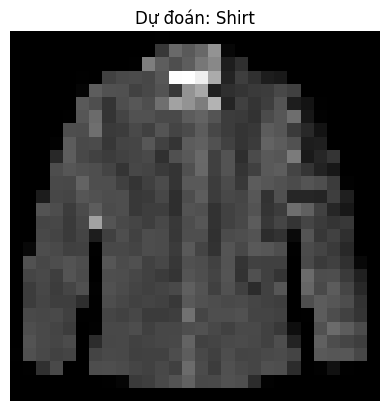

In [33]:
from keras.datasets import fashion_mnist
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()


x_valid, x_train = x_train[:5000] / 255.0, x_train[5000:] / 255.0
y_valid, y_train = y_train[:5000], y_train[5000:]
x_test = x_test / 255.0

y_train_cat = to_categorical(y_train)
y_valid_cat = to_categorical(y_valid)
y_test_cat = to_categorical(y_test)


model = Sequential()
model.add(Flatten(input_shape=[28, 28]))
model.add(Dense(300, activation="relu"))
model.add(Dense(100, activation="relu"))
model.add(Dense(10, activation="softmax"))

model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])


history = model.fit(x_train, y_train_cat, epochs=20, batch_size=128, validation_data=(x_valid, y_valid_cat))


test_loss, test_acc = model.evaluate(x_test, y_test_cat)
print(' Độ chính xác trên tập test:', test_acc)


label_names = [         'T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

image_path = '/content/drive/MyDrive/ảnh/shirt.jpg'
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (28, 28))
img = cv2.bitwise_not(img)
img = img.astype('float32') / 255.0
img_input = img.reshape(1, 28, 28)

prediction = model.predict(img_input)
predicted_label = np.argmax(prediction)

print(" Dự đoán ảnh là:", label_names[predicted_label])
plt.imshow(img, cmap='gray')
plt.title(f"Dự đoán: {label_names[predicted_label]}")
plt.axis('off')
plt.show()
model.save("fashion_model.keras")


Epoch 1/20
430/430 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.5550 - loss: 1.4288 - val_accuracy: 0.7640 - val_loss: 0.7085
Epoch 2/20
430/430 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.7775 - loss: 0.6803 - val_accuracy: 0.8114 - val_loss: 0.5831
Epoch 3/20
430/430 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.8096 - loss: 0.5754 - val_accuracy: 0.8314 - val_loss: 0.5181
Epoch 4/20
430/430 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8245 - loss: 0.5270 - val_accuracy: 0.8438 - val_loss: 0.4864
Epoch 5/20
430/430 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8342 - loss: 0.4960 - val_accuracy: 0.8426 - val_loss: 0.4694
Epoch 6/20
430/430 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.8367 - loss: 0.4735 - val_accuracy: 0.8560 - val_loss: 0.4459
Epoch 7/20
430/430 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8425 - loss: 0.4568 - val_accuracy: 0.8558 - val_loss: 0.4418
Epoch 8/20
430/430 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8447 - loss: 0.4482 - val_accuracy:

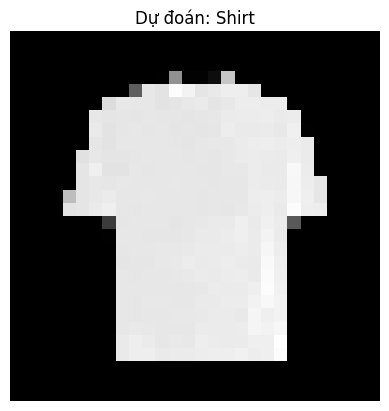

In [26]:
from keras.datasets import fashion_mnist
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()


x_valid, x_train = x_train[:5000] / 255.0, x_train[5000:] / 255.0
y_valid, y_train = y_train[:5000], y_train[5000:]
x_test = x_test / 255.0

y_train_cat = to_categorical(y_train)
y_valid_cat = to_categorical(y_valid)
y_test_cat = to_categorical(y_test)


model = Sequential()
model.add(Flatten(input_shape=[28, 28]))
model.add(Dense(300, activation="relu"))
model.add(Dense(100, activation="relu"))
model.add(Dense(10, activation="softmax"))

model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])


history = model.fit(x_train, y_train_cat, epochs=20, batch_size=128, validation_data=(x_valid, y_valid_cat))


test_loss, test_acc = model.evaluate(x_test, y_test_cat)
print(' Độ chính xác trên tập test:', test_acc)


label_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

image_path = '/content/drive/MyDrive/ảnh/tee.webp'
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (28, 28))
img = cv2.bitwise_not(img)
img = img.astype('float32') / 255.0
img_input = img.reshape(1, 28, 28)

prediction = model.predict(img_input)
predicted_label = np.argmax(prediction)

print(" Dự đoán ảnh là:", label_names[predicted_label])
plt.imshow(img, cmap='gray')
plt.title(f"Dự đoán: {label_names[predicted_label]}")
plt.axis('off')
plt.show()
model.save("fashion_model.keras")


Epoch 1/20
430/430 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.5720 - loss: 1.4393 - val_accuracy: 0.7492 - val_loss: 0.7296
Epoch 2/20
430/430 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7766 - loss: 0.6791 - val_accuracy: 0.8106 - val_loss: 0.5871
Epoch 3/20
430/430 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8100 - loss: 0.5759 - val_accuracy: 0.8264 - val_loss: 0.5229
Epoch 4/20
430/430 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8238 - loss: 0.5267 - val_accuracy: 0.8338 - val_loss: 0.4988
Epoch 5/20
430/430 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8334 - loss: 0.4919 - val_accuracy: 0.8358 - val_loss: 0.4855
Epoch 6/20
430/430 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8339 - loss: 0.4771 - val_accuracy: 0.8488 - val_loss: 0.4511
Epoch 7/20
430/430 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.8435 - loss: 0.4587 - val_accuracy: 0.8420 - val_loss: 0.4633
Epoch 8/20
430/430 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8462 - loss: 0.4483 - val_accuracy: 

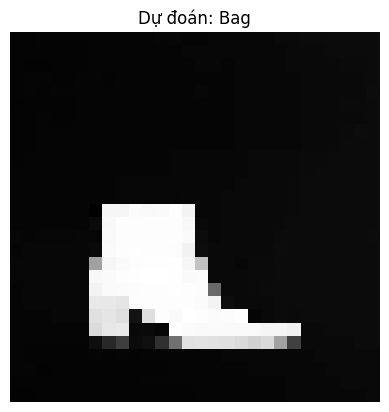

In [27]:
from keras.datasets import fashion_mnist
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()


x_valid, x_train = x_train[:5000] / 255.0, x_train[5000:] / 255.0
y_valid, y_train = y_train[:5000], y_train[5000:]
x_test = x_test / 255.0

y_train_cat = to_categorical(y_train)
y_valid_cat = to_categorical(y_valid)
y_test_cat = to_categorical(y_test)


model = Sequential()
model.add(Flatten(input_shape=[28, 28]))
model.add(Dense(300, activation="relu"))
model.add(Dense(100, activation="relu"))
model.add(Dense(10, activation="softmax"))

model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])


history = model.fit(x_train, y_train_cat, epochs=20, batch_size=128, validation_data=(x_valid, y_valid_cat))


test_loss, test_acc = model.evaluate(x_test, y_test_cat)
print(' Độ chính xác trên tập test:', test_acc)


label_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

image_path = '/content/drive/MyDrive/ảnh/boots.jpg'
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (28, 28))
img = cv2.bitwise_not(img)
img = img.astype('float32') / 255.0
img_input = img.reshape(1, 28, 28)

prediction = model.predict(img_input)
predicted_label = np.argmax(prediction)

print(" Dự đoán ảnh là:", label_names[predicted_label])
plt.imshow(img, cmap='gray')
plt.title(f"Dự đoán: {label_names[predicted_label]}")
plt.axis('off')
plt.show()
model.save("fashion_model.keras")
